In [70]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
#%matplotlib
from datetime import datetime


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [120]:
filename = "shortened.csv"

#create sample dataframe 
global_temp_city  = pd.read_csv(filename).dropna()
#global_temp_city = global_temp_city.drop('Unnamed: 0', 1)   #this is here for if we used the random files that albert added on github

#format dt column to be a datetime value 
global_temp_city['dt'] =  pd.to_datetime(global_temp_city['dt'])

global_temp_city[:6]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01 00:00:00,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01 00:00:00,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01 00:00:00,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01 00:00:00,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01 00:00:00,16.082,1.396,Århus,Denmark,57.05N,10.33E
10,1744-09-01 00:00:00,12.781,1.454,Århus,Denmark,57.05N,10.33E


In [121]:
#create new column for year and average temp for each year 
global_temp_city['year']= global_temp_city['dt'].map(lambda x: x.date().year)
global_temp_city[0:6]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01 00:00:00,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
5,1744-04-01 00:00:00,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744
6,1744-05-01 00:00:00,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744
7,1744-06-01 00:00:00,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744
8,1744-07-01 00:00:00,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744
10,1744-09-01 00:00:00,12.781,1.454,Århus,Denmark,57.05N,10.33E,1744


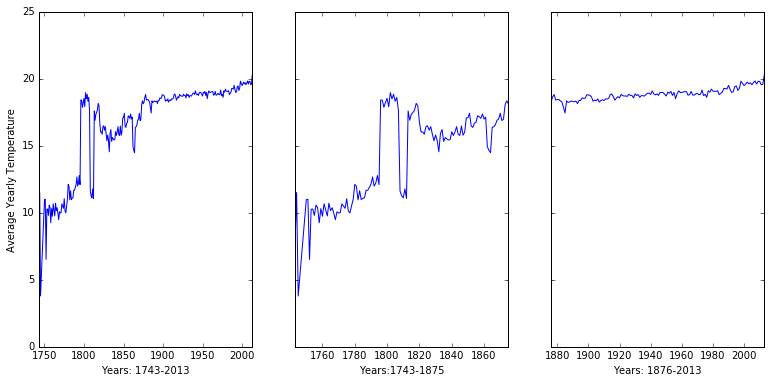

In [122]:
# average temperatures for different years
yearlyAvgTemps = global_temp_city.groupby('year')['AverageTemperature'].mean()
yearlyTempCount = global_temp_city.groupby('year')['AverageTemperature'].count()

# create dataframe with info
yearlyAvgTempsDF = DataFrame({'avgTemp':yearlyAvgTemps.values,'year':yearlyAvgTemps.index.values})


#built this subplot to look at the avg temp per year and compare two different time frames where the temperature 
#measurements seem to be wildly different. I think this has to do with thermometer technology improving over time
#first plot shows all years, second plot shows 1743-1875, third shows 1876 -2013
fig, (ax1,ax2,ax3)= subplots(nrows=1, ncols=3,sharey=True,figsize=(13,6))
yearlyAvgTemps.plot(ax=ax1)
ax1.set_ylabel('Average Yearly Temperature')
ax1.set_xlabel('Years: 1743-2013')
yearlyAvgTemps[:129].plot(ax=ax2)
ax2.set_xlabel('Years:1743-1875')
yearlyAvgTemps[129:].plot(ax=ax3)
ax3.set_xlabel('Years: 1876-2013')

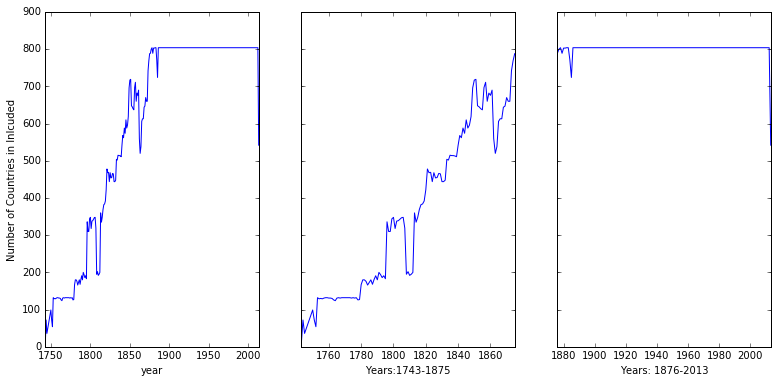

In [123]:
fig2, (ax1,ax2,ax3)= subplots(nrows=1, ncols=3,sharey=True,figsize=(13,6))
yearlyTempCount.plot(ax=ax1)
ax1.set_ylabel('Number of Countries in Inlcuded')
ax2.set_xlabel('Years: 1743-2013')
yearlyTempCount[:129].plot(ax=ax2)
ax2.set_xlabel('Years:1743-1875')
yearlyTempCount[129:].plot(ax=ax3)
ax3.set_xlabel('Years: 1876-2013')

In [124]:
#Some descriptive stats to show the differences in the time periods that we described above.
#Here we can clearly see through the STD Dev that the first time period had really spread out measurements 
#it stabilized in the second period
DF2= DataFrame()
DF2['All Years']=yearlyAvgTemps.describe()
DF2['1742-1875'] = yearlyAvgTemps[:129].describe()
DF2['1876-2013'] = yearlyAvgTemps[129:].describe()
DF2

,All Years,1742-1875,1876-2013
count,267.000000,129.000000,138.000000
mean,16.620170,14.208123,18.874909
std,3.286929,3.301486,0.440402
min,3.797611,3.797611,17.459581
25%,15.789244,11.012333,18.581008
50%,18.358076,15.632451,18.837322
75%,18.847985,16.993055,19.071381
max,20.336554,18.981166,20.336554


In [111]:
# Now i want to run a regression usuing the yearlyAvgTemps buy separating them by the time periods.

In [125]:
all_years = pd.ols(x=yearlyAvgTempsDF['year'],y=yearlyAvgTempsDF['avgTemp'])
first_group = pd.ols(x=yearlyAvgTempsDF['year'][:129],y=yearlyAvgTempsDF['avgTemp'][:129])
second_group = pd.ols(x=yearlyAvgTempsDF['year'][129:],y=yearlyAvgTempsDF['avgTemp'][129:])


In [126]:
#i printed the result and what I see is that the change over time can be better explained by the change in years
#when separated. the change in temperature  can be better explained by the increase in years after 1875.
print all_years
print first_group
print second_group


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         267
Number of Degrees of Freedom:   2

R-squared:         0.6868
Adj R-squared:     0.6856

Rmse:              1.8429

F-stat (1, 265):   581.1750, p-value:     0.0000

Degrees of Freedom: model 1, resid 265

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0352     0.0015      24.11     0.0000     0.0324     0.0381
     intercept   -49.6303     2.7504     -18.04     0.0000   -55.0211   -44.2395
---------------------------------End of Summary---------------------------------


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         129
Number

In [127]:
#a mask that filters out the years so we can filter out the old data that we decided not to use for analysis
#
year_mask = ('year'>1875)



In [128]:
# add city, country column to main DF
global_temp_city["city_country"] = global_temp_city["City"]+", "+global_temp_city['Country']


In [129]:
# merge original dataframe with yearly averages dataframe
global_temp_city_w_yrlyAvg = pd.merge(global_temp_city, yearlyAvgTempsDF,\
                          left_on = 'year', right_on = 'year',\
                           suffixes=['_alldata','avgYearTemps'])
global_temp_city_w_yrlyAvg[:10]


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,city_country,avgTemp
0,1743-11-01 00:00:00,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,"Århus, Denmark",7.399889
1,1743-11-01 00:00:00,10.013,2.291,Çorlu,Turkey,40.99N,27.69E,1743,"Çorlu, Turkey",7.399889
2,1743-11-01 00:00:00,10.779,1.942,A Coruña,Spain,42.59N,8.73W,1743,"A Coruña, Spain",7.399889
3,1743-11-01 00:00:00,6.425,1.628,Aachen,Germany,50.63N,6.34E,1743,"Aachen, Germany",7.399889
4,1743-11-01 00:00:00,6.068,1.737,Aalborg,Denmark,57.05N,10.33E,1743,"Aalborg, Denmark",7.399889
5,1743-11-01 00:00:00,8.758,1.886,Aberdeen,United Kingdom,57.05N,1.48W,1743,"Aberdeen, United Kingdom",7.399889
6,1743-11-01 00:00:00,7.478,1.866,Aix En Provence,France,44.20N,4.47E,1743,"Aix En Provence, France",7.399889
7,1743-11-01 00:00:00,3.209,1.961,Akron,United States,40.99N,80.95W,1743,"Akron, United States",7.399889
8,1743-11-01 00:00:00,7.801,2.002,Albacete,Spain,39.38N,2.08W,1743,"Albacete, Spain",7.399889
9,1744-04-01 00:00:00,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744,"Århus, Denmark",11.524361


In [130]:
# average temperatures for all years for different cities
cityAvgTempsAllYrs = global_temp_city.groupby(['city_country','Latitude','Longitude'])['AverageTemperature'].mean()

#create dataframe with information (because series suck)
cityAvgTempsAllYrsDF = DataFrame({'temporary':cityAvgTempsAllYrs.index.values,\
                           'avgTemp':cityAvgTempsAllYrs.values})
cityAvgTempsAllYrsDF['city_country'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[0])
cityAvgTempsAllYrsDF['lat'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[1])
cityAvgTempsAllYrsDF['long'] = cityAvgTempsAllYrsDF['temporary'].map(lambda x : x[2])
cityAvgTempsAllYrsDF = cityAvgTempsAllYrsDF.drop('temporary', 1)          


cityAvgTempsAllYrsDF[:10]

,avgTemp,city_country,lat,long
0,13.147277,"A Coruña, Spain",42.59N,8.73W
1,8.825173,"Aachen, Germany",50.63N,6.34E
2,7.695135,"Aalborg, Denmark",57.05N,10.33E
3,26.612824,"Aba, Nigeria",5.63N,8.07E
4,25.034749,"Abadan, Iran",29.74N,48.00E
5,26.612824,"Abakaliki, Nigeria",5.63N,8.07E
6,-0.551814,"Abakan, Russia",53.84N,91.36E
7,7.261619,"Abbotsford, Canada",49.03N,122.45W
8,26.418886,"Abengourou, Côte D'Ivoire",7.23N,4.05W
9,26.373105,"Abeokuta, Nigeria",7.23N,4.05E


In [131]:
# average temperatures each year for different cities
cityAvgTempsEachYr = global_temp_city.groupby(['city_country','Latitude','Longitude','year'])['AverageTemperature'].mean()

#create dataframe with information (because series suck)
cityAvgTempsEachYrDF = DataFrame({'temporary':cityAvgTempsEachYr.index.values,\
                           'avgTemp':cityAvgTempsEachYr.values})
cityAvgTempsEachYrDF['city_country'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[0])
cityAvgTempsEachYrDF['lat'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[1])
cityAvgTempsEachYrDF['long'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[2])
cityAvgTempsEachYrDF['year'] = cityAvgTempsEachYrDF['temporary'].map(lambda x : x[3])
cityAvgTempsEachYrDF = cityAvgTempsEachYrDF.drop('temporary', 1)          


print cityAvgTempsEachYrDF

         avgTemp     city_country     lat    long  year
0      10.779000  A Coruña, Spain  42.59N   8.73W  1743
1      13.678125  A Coruña, Spain  42.59N   8.73W  1744
2       9.170500  A Coruña, Spain  42.59N   8.73W  1745
3      13.489273  A Coruña, Spain  42.59N   8.73W  1750
4      13.698500  A Coruña, Spain  42.59N   8.73W  1751
5      10.771333  A Coruña, Spain  42.59N   8.73W  1752
6      13.151833  A Coruña, Spain  42.59N   8.73W  1753
7      13.221000  A Coruña, Spain  42.59N   8.73W  1754
8      12.906000  A Coruña, Spain  42.59N   8.73W  1755
9      13.255500  A Coruña, Spain  42.59N   8.73W  1756
10     13.131333  A Coruña, Spain  42.59N   8.73W  1757
11     11.906750  A Coruña, Spain  42.59N   8.73W  1758
12     12.985583  A Coruña, Spain  42.59N   8.73W  1759
13     12.465333  A Coruña, Spain  42.59N   8.73W  1760
14     13.230667  A Coruña, Spain  42.59N   8.73W  1761
15     13.110250  A Coruña, Spain  42.59N   8.73W  1762
16     12.384083  A Coruña, Spain  42.59N   8.73

In [132]:
# create pivottable/timeseries
date_city_pivot = pd.pivot_table(cityAvgTempsEachYrDF,\
                                index='year',\
                                columns='city_country')
date_city_pivot[50:100]

avgTemp                                                \
city_country A Coruña, Spain Aachen, Germany Aalborg, Denmark Aba, Nigeria   
year                                                                         
1797               12.846583        9.280583         8.641083          NaN   
1798               13.286000        9.033000         8.470417          NaN   
1799               12.745417        7.044000         5.862583          NaN   
1800               13.553000        8.823417         7.066750          NaN   
1801               13.427500        9.225000         8.022917          NaN   
1802               13.523917        8.747333         7.458333          NaN   
1803               13.315333        7.923667         6.833417          NaN   
1804               13.754083        8.506417         7.104000          NaN   
1805               13.033333        7.146083         6.266000          NaN   
1806               13.445750        9.522333         7.748417          NaN   
1807               12.745417        8.877833         7.512583          NaN   
1808               12.315167        7.970250         7.241167          NaN   
1809               12.251167        8.371167         7.065083          NaN   
1810               11.959750        8.230750         7.030583          NaN   
1811               12.329750        9.858583         8.466667          NaN   
1812               12.142250        7.639917         6.239250          NaN   
1813               12.394333        8.342500         7.708917          NaN   
1814               12.018583        7.623500         6.281083          NaN   
1815               12.464417        8.403583         7.380583          NaN   
1816               11.851917        7.310917         6.586667          NaN   
1817               12.890750        8.546333         7.535750          NaN   
1818               13.333417        8.978333         8.044000          NaN   
1819               12.576417        9.253333         8.190333          NaN   
1820               12.426750        7.947083         6.796500          NaN   
1821               13.403917        8.988250         7.716167          NaN   
1822               13.191500       10.004250         9.043333          NaN   
1823               12.736417        8.265583         7.222167          NaN   
1824               13.163417        8.968417         8.349167          NaN   
1825               13.315833        9.516000         8.307750          NaN   
1826               13.105250        9.239000         8.690167          NaN   
1827               13.039917        8.610750         7.554917          NaN   
1828               13.358583        9.348417         7.838333          NaN   
1829               12.510750        6.870333         5.815333          NaN   
1830               12.998000        7.911000         6.972583          NaN   
1831               13.292167        9.395250         7.975750          NaN   
1832               12.736500        8.222417         7.649500          NaN   
1833               12.773167        8.762833         7.678917          NaN   
1834               13.720250       10.101417         8.868000          NaN   
1835               12.735250        8.677500         7.702750          NaN   
1836               12.822750        8.825917         7.228333          NaN   
1837               12.837000        8.034500         6.991167          NaN   
1838               12.789000        7.395750         5.817333          NaN   
1839               12.752083        8.760500         6.954833          NaN   
1840               12.607083        7.852417         6.725417          NaN   
1841               12.778583        9.112250         7.287083          NaN   
1842               12.882750        8.530583         8.214000          NaN   
1843               13.075250        8.889417         7.830250          NaN   
1844               12.888083        7.906000         6.463000          NaN   
1845               12.470917        7.60058

In [139]:
test1 = date_city_pivot - date_city_pivot.shift(1)

In [140]:
test1

avgTemp                                                \
city_country A Coruña, Spain Aachen, Germany Aalborg, Denmark Aba, Nigeria   
year                                                                         
1743                     NaN             NaN              NaN          NaN   
1744                2.899125        3.665125         2.939125          NaN   
1745               -4.507625       -7.539375        -8.980625          NaN   
1750                4.318773        7.151523         8.699045          NaN   
1751                0.209227       -0.186523        -0.679170          NaN   
1752               -2.927167       -4.240417        -3.955542          NaN   
1753                2.380500        3.507417         3.327833          NaN   
1754                0.069167       -0.330583        -0.091583          NaN   
1755               -0.315000       -0.250917        -0.244250          NaN   
1756                0.349500        0.593500         0.694000          NaN   
1757               -0.124167       -0.203500         0.113250          NaN   
1758               -1.224583       -0.314583        -0.976083          NaN   
1759                1.078833        0.932000         1.156583          NaN   
1760               -0.520250       -0.113583        -0.640583          NaN   
1761                0.765333        0.033500         0.877500          NaN   
1762               -0.120417       -0.699750        -1.122333          NaN   
1763               -0.726167       -0.172333        -0.078583          NaN   
1764                0.716417        0.603167         0.455500          NaN   
1765                0.037000       -0.243500        -0.462917          NaN   
1766               -0.131417       -0.159000         0.838333          NaN   
1767                0.206000       -0.215833        -0.991083          NaN   
1768               -0.757583        0.097583         0.082917          NaN   
1769                0.452833        0.157417         0.338417          NaN   
1770               -0.151583       -0.013833        -0.057500          NaN   
1771                0.437833       -0.462500        -0.743167          NaN   
1772                0.428250        1.236500         0.671667          NaN   
1773               -0.779000       -0.092667         1.144250          NaN   
1774                0.673333       -0.500500        -1.524500          NaN   
1775                0.151083        0.842083         1.795917          NaN   
1776               -0.557083       -0.973083        -1.080667          NaN   
...                      ...             ...              ...          ...   
1984               -0.358333       -0.789000        -0.318333    -0.000500   
1985                0.364667       -0.755667        -1.710917    -0.152750   
1986               -0.542333        0.548917         0.617417     0.002667   
1987                1.078417       -0.337917        -0.472417     0.660333   
1988               -0.399750        1.465250         1.983333    -0.352667   
1989                1.096667        0.491167         0.788500    -0.534417   
1990               -0.412000       -0.042750         0.149500     0.628083   
1991               -0.889583       -1.161667        -1.108500    -0.140333   
1992               -0.086750        0.838583         0.698917    -0.321583   
1993               -0.092000       -0.623750        -1.311750     0.202250   
1994                0.376667        1.113667         0.802583    -0.002667   
1995                1.002417       -0.444917        -0.260500     0.249917   
1996               -0.943333       -1.811833        -1.290750    -0.100417   
1997                1.199833        1.611667         1.652667    -0.035750   
1998               -0.725000       -0.117833        -0.537083     0.622833   
1999               -0.421417        0.585917         0.754417    -0.568500   
2000               -0.065083        0.198500         0.457417    -0.113917   
2001                0.074917       -0.56800

In [13]:
def regressOnYr(s):
    sDF = DataFrame({'year':s.index.values,\
                           'temps':s.values})
    result = pd.ols(x=sDF['year'],y=sDF['temps'])
    return result
    
    

In [46]:
timeOnAvgTempEachCity = date_city_pivot.apply(regressOnYr)

#change to datafram
timeOnAvgTempEachCityDF = DataFrame({'temporary':timeOnAvgTempEachCity.index.values,\
                           'regResults':timeOnAvgTempEachCity.values})
timeOnAvgTempEachCityDF['city_country'] = timeOnAvgTempEachCityDF['temporary'].map(lambda x : x[1])
timeOnAvgTempEachCityDF = timeOnAvgTempEachCityDF.drop('temporary', 1) 

#add relevant regression information to DF
timeOnAvgTempEachCityDF['slope']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.beta['x'])
timeOnAvgTempEachCityDF['Y-intercept']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.beta['intercept'])
timeOnAvgTempEachCityDF['R2']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.r2)
timeOnAvgTempEachCityDF['pval']=timeOnAvgTempEachCityDF['regResults'].map(lambda x: x.p_value)

timeOnAvgTempEachCityDF


,regResults,city_country,slope,Y-intercept,R2,pval
0,\n-------------------------Summary of Regressi...,"A Coruña, Spain",0.003533,6.485449,0.190892,x 7.140240e-14 intercept 2.47345...
1,\n-------------------------Summary of Regressi...,"Aachen, Germany",0.004201,0.900689,0.138122,x 3.603535e-10 intercept 4.58387...
2,\n-------------------------Summary of Regressi...,"Aalborg, Denmark",0.004473,-0.741463,0.123617,x 3.466823e-09 intercept 5.90568...
3,\n-------------------------Summary of Regressi...,"Aba, Nigeria",0.008980,9.195386,0.562636,x 5.286647e-28 intercept 2.42996...
4,\n-------------------------Summary of Regressi...,"Abadan, Iran",0.010110,5.524804,0.146524,x 1.454853e-07 intercept 1.21623...
5,\n-------------------------Summary of Regressi...,"Abakaliki, Nigeria",0.008980,9.195386,0.562636,x 5.286647e-28 intercept 2.42996...
6,\n-------------------------Summary of Regressi...,"Abakan, Russia",0.009742,-19.222048,0.304126,x 7.872777e-17 intercept 1.39452...
7,\n-------------------------Summary of Regressi...,"Abbotsford, Canada",0.007547,-7.245882,0.269976,x 4.815332e-14 intercept 6.60095...
8,\n-------------------------Summary of Regressi...,"Abengourou, Côte D'Ivoire",0.009352,8.320591,0.654139,x 2.475112e-37 intercept 6.75732...
9,\n-------------------------Summary of Regressi...,"Abeokuta, Nigeria",0.008979,8.958110,0.512126,x 1.614620e-24 intercept 2.34340...
